In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import re
import string
import nltk
import pandas as pd
import json
import gzip
import numpy as np
from tqdm.notebook import tqdm
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from collections import defaultdict
import random
random.seed(10)

In [ ]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Video_Games_5.json.gz

--2020-06-21 09:27:30--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Video_Games_5.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154050105 (147M) [application/octet-stream]
Saving to: ‘Video_Games_5.json.gz’

Video_Games_5.json. 100%[===================>] 146.91M  20.5MB/s    in 8.1s    

2020-06-21 09:27:39 (18.2 MB/s) - ‘Video_Games_5.json.gz’ saved [154050105/154050105]



In [ ]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/metaFiles/meta_Video_Games.json.gz

--2020-06-21 09:27:43--  http://deepyeti.ucsd.edu/jianmo/amazon/metaFiles/meta_Video_Games.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80222877 (77M) [application/octet-stream]
Saving to: ‘meta_Video_Games.json.gz’

meta_Video_Games.js 100%[===================>]  76.51M  21.7MB/s    in 4.4s    

2020-06-21 09:27:48 (17.5 MB/s) - ‘meta_Video_Games.json.gz’ saved [80222877/80222877]



In [ ]:
data = []
with gzip.open('meta_Video_Games.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))

In [ ]:
data2 = []
with gzip.open('Video_Games_5.json.gz') as f:
    for l in f:
        data2.append(json.loads(l.strip()))

# **Data Preprocessing**

In [ ]:
df_og=pd.DataFrame.from_dict(data2)

In [ ]:
df_meta=pd.DataFrame.from_dict(data)

In [ ]:
asin_to_name= dict(zip(df_meta.asin, df_meta.title))
def asin_to_title(asin_list):
  title_list=[asin_to_name[x] for x in asin_list]
  return title_list

In [ ]:
#df_meta["title"]=df_meta["title"].astype(str)
#df_meta['lentitle']=df_meta["title"].apply(lambda x: len(x))

In [ ]:
df_og=df_og[["overall","reviewerID","asin"]]

In [ ]:
df_og.drop_duplicates(["reviewerID","asin"],keep=False,inplace=True)

In [ ]:
df=df_og.groupby("asin").nunique()

In [ ]:
df_og.set_index(df_og["asin"],drop=False,inplace=True)

In [ ]:
#drop_asin=df.loc[df["reviewerID"]<15].index
#df_og.drop(drop_asin,inplace=True,errors="ignore")
df_og.reset_index(drop=True,inplace=True)

In [ ]:
del(data,df,data2)

In [ ]:
#del(drop_asin)

In [ ]:
%%time
df_review= pd.read_pickle('/content/drive/My Drive/df_pivot.pkl')


CPU times: user 284 ms, sys: 1.29 s, total: 1.58 s
Wall time: 7.57 s


In [ ]:
df_review.shape

(17340, 55172)

In [ ]:
df_review=df_review.T

In [ ]:
df_review.head(2)

asin,0700026398,0700026657,0700099867,0804161380,3828770193,6050036071,7293000936,7544256944,8176503290,8565000168,907843905X,9625990674,9629971372,9867299434,9882100848,9882106463,9882155456,B000003SQQ,B000006OVE,B000006OVF,B000006OVG,B000006OVI,B000006OVJ,B000006OVK,B000006OVL,B000006OWR,B000006OWS,B000006OWT,B000006P0J,B000006P0K,B000006P0M,B000006P0P,B000006RGO,B000006RGP,B000006RGQ,B000006RGR,B000006RGS,B000007NJC,B000009QCX,B000009QD1,...,B01H0TGLBU,B01H1GJ7IQ,B01H1QQW20,B01H1QQWDO,B01H1QQWFM,B01H1WR47G,B01H2DKGZQ,B01H2DKHCS,B01H2DKHPA,B01H2DKHSM,B01H2DKHZ0,B01H2DKI3G,B01H2DKIDG,B01H2F5R6C,B01H3NU4OS,B01H3Z4MYE,B01H440QZI,B01H482N6E,B01H4RS5AI,B01H5BJNXG,B01H5XD36C,B01H6DHITE,B01H6GUCCQ,B01H6SM5CY,B01H74VPX2,B01H7VI5TC,B01H867JUM,B01H9CCDYW,B01HC8QZG0,B01HD1B64C,B01HD1B76O,B01HD2TECW,B01HDJFJKG,B01HDJFJLK,B01HDJFJOM,B01HFRICLE,B01HGPUTCA,B01HH6JEOC,B01HIZF7XE,B01HIZGKOE
reviewerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A0059486XI1Z0P98KP35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A0220159ZRNBTRKLG08H,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Plots**

In [ ]:
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt


In [ ]:
u='A14XH33SGMTA7R'
df=group_user.get_group(u)
flag=0
df=df.loc[df["overall"]>2]
asin1=[i for i in df["asin"]]
recs=get_recommendations(u,20,sparse,asin1)
d =['A13FA19J89IZO0', 'A1B2SVLM76Z26', 'A1TGOLREJYZFMD', 'A11HOXL92DUW7T', 'A1HG69ME8C6U3Q'] 
d.append(u)

['A13FA19J89IZO0', 'A1B2SVLM76Z26', 'A1TGOLREJYZFMD', 'A11HOXL92DUW7T', 'A1HG69ME8C6U3Q', 'A3PQGXCIKH2PZK', 'A247F4H1BEMVHH', 'AF5O71MTL3UUM', 'A2RPG0G1UGUFKL', 'A2W9LNYTFUCDK5', 'A34SGXL3BK2AAQ', 'A199FKAKFDSY3J', 'A2KGTIG05HRSAV', 'ABO6TG6Y8L091', 'A31US0T606JYFY', 'A19W9BXE8K17EC', 'A2YNFIJA674AKN', 'A194GR8CAMVSYD', 'A1T6KX072SZ62B', 'A8BGLZG78TKEM', 'AHZ22NT0TF9KD', 'AXZO1G3Y0UUW5', 'A110NSF22U73QI', 'A3LG1RX5PBWKRD', 'A2UFI2HQ8LP6ZP', 'A94RFHUXK9893', 'A1RI2PR9Q9EMK7', 'A16Z2OECAUX8Z4', 'A170THNVP0MS2G', 'A1EFCP0UV4TTIY']


In [ ]:
dit=[]
for i in d:
   for j in df_og[df_og.reviewerID ==i].asin.values:
     dit.append((i,asin_to_name[j]))

In [ ]:
dit

[('A13FA19J89IZO0', 'PlayStation 2 Console Slim PS2'),
 ('A1B2SVLM76Z26', 'PlayStation 2 Console Slim PS2'),
 ('A1TGOLREJYZFMD',
  'Warcraft 2 Battle Chest: Tides of Darkness / Beyond the Dark Portal'),
 ('A1TGOLREJYZFMD', "Age Of Empires Collector's Edition (Limited Edition)"),
 ('A1TGOLREJYZFMD', 'PlayStation 2 Console Slim PS2'),
 ('A1TGOLREJYZFMD', 'Age of Wonders - PC'),
 ('A11HOXL92DUW7T', "Age Of Empires Collector's Edition (Limited Edition)"),
 ('A11HOXL92DUW7T', 'Rome: Total War Gold Edition - PC'),
 ('A11HOXL92DUW7T',
  'Rise of Nations + Rise of Nations: Thrones & Patriots - PC'),
 ('A11HOXL92DUW7T', 'Empire: Total War - PC'),
 ('A11HOXL92DUW7T', 'Age of Empires III Complete Collection [Download]'),
 ('A3PQGXCIKH2PZK', 'Grand Theft Auto III'),
 ('A3PQGXCIKH2PZK', 'Jak 3 - PlayStation 2'),
 ('A3PQGXCIKH2PZK', 'PlayStation 2 Console Slim PS2'),
 ('A14XH33SGMTA7R', 'Mega Man X Collection - PlayStation 2'),
 ('A14XH33SGMTA7R', "Age Of Empires Collector's Edition (Limited Edition

In [ ]:
color_dict ={
    'A13FA19J89IZO0':'#f18d00',
    'A1B2SVLM76Z26':'#f18d00',
    'A1TGOLREJYZFMD':'#f18d00',
    'A11HOXL92DUW7T':'#f18d00',
    'A1HG69ME8C6U3Q':'#f18d00',
'A14XH33SGMTA7R':'#bbdaa4'


}
for i,j in dit:
  color_dict[j] ='#9bbff4' 

In [ ]:
w={}
for i, j in dit:
  if j in w:
    w[j]+=1
  else:
    w[j]=1

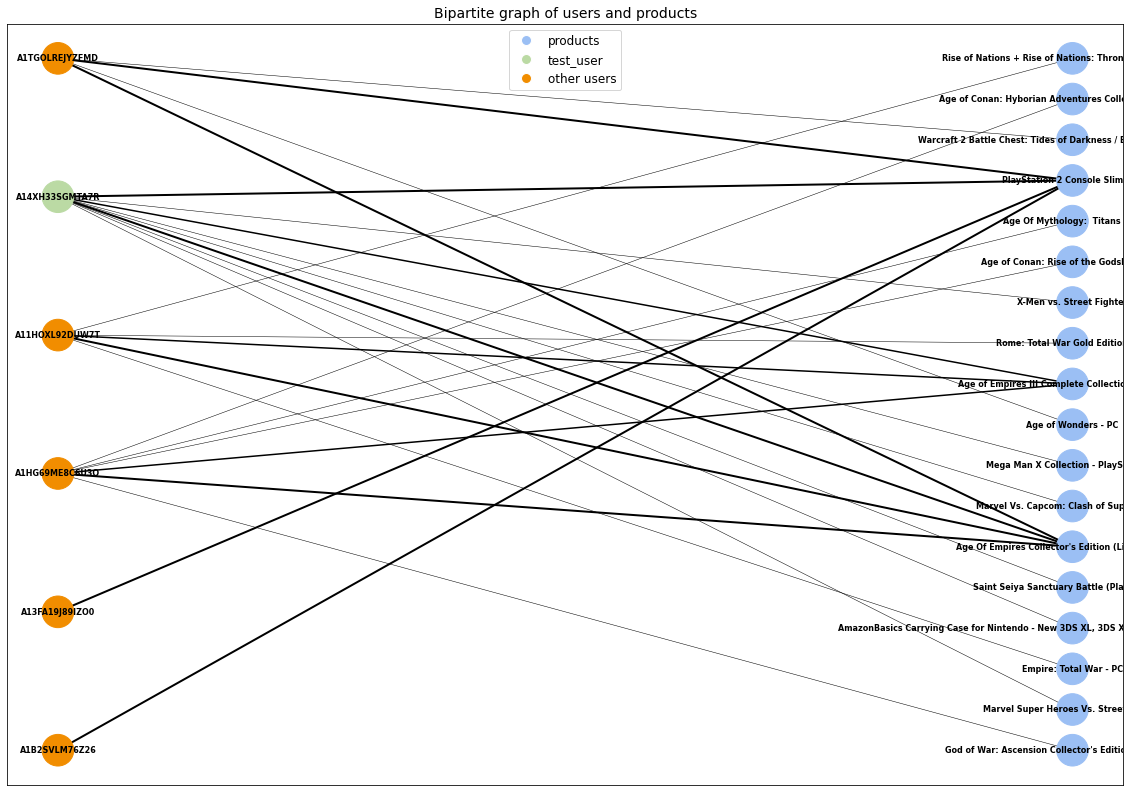

In [ ]:
G = nx.Graph()
# iterate over very every item in the dictionary of interactions
for k ,v in dit:
    G.add_edge(k, v ,weight =w[v])
max_edge = max(w.values()) 
edges = G.edges()

weights = [G[u][v]['weight']/(max_edge/2) for u,v in edges]


top = nx.bipartite.sets(G)[0]
pos = nx.bipartite_layout(G, top)
colors = [color_dict[node] for node in G.nodes()]
plt.figure(figsize=(20, 14))
nx.draw_networkx(G,pos, node_size = 1000 , node_color = colors,width = weights , font_size =8, font_weight ='heavy')
ax = plt.gca()
from matplotlib.lines import Line2D
ax.set_title("Bipartite graph of users and products", fontsize = 14)
custom_lines = [Line2D([0], [0], marker = 'o', markerfacecolor = "#9bbff4", markersize = 10, color = 'w'),
                Line2D([0], [0], marker = 'o', markerfacecolor = "#bbdaa4", markersize = 10, color = 'w'),
                Line2D([0], [0], marker = 'o', markerfacecolor = "#f18d00", markersize = 10, color = 'w')]
ax.legend(custom_lines, ['products', 'test_user', "other users"], loc = "upper center", fontsize = 12)


# **Modelling**

In [ ]:
asin_to_int=dict({i:count for count,i in enumerate(df_review.columns)})
int_to_asin=dict({i:count for i,count in enumerate(df_review.columns)})
userid_to_int=dict({i:count for count,i in enumerate(df_review.index)})
int_to_userid=dict({i:count for i,count in enumerate(df_review.index)})
asin_score=dict({i:0 for i in df_review.columns})

In [ ]:
sparse=csr_matrix(df_review.values)

In [ ]:
sparse.shape

(55172, 17340)

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel
# Compute the cosine similarity matrix

In [ ]:
def similarity(userid_int,sparse1):
  temp=cosine_similarity(sparse1[userid_int].reshape(1,-1),sparse1)
  cosine_sim=temp[0]
  cosine_sim[userid_int]=0
  return cosine_sim

In [ ]:
def get_top_n(asin_score,u,num_of_recs,asin1):
  sorted_recs={k: v for k, v in sorted(asin_score.items(), key=lambda item: item[1],reverse=True)}
  top_n_recs=[]
  count=0
  for i in sorted_recs.keys():
    if i not in asin1:
      top_n_recs.append(i)
      count+=1
    if count==num_of_recs:
      break
  return top_n_recs      

In [ ]:
group_user=df_og.groupby("reviewerID")
df=group_user.nunique()
# df=df.loc[df["asin"]>6]
user_list=df.index

In [ ]:
def get_recommendations(u,num_of_recs,sparse1,asin1):
  sim_users=similar_users(u,sparse1)
  sims=[0]
  asin_score_loc=asin_score
  for i,sim_score in sim_users.items():
    df=group_user.get_group(int_to_userid[i])
    for count,j in enumerate(df["asin"].values):
        asin_score_loc[j]= asin_score_loc[j]+(df["overall"].iloc[count]*sim_score)
  temp=get_top_n(asin_score,u,num_of_recs,asin1)
  return temp

In [ ]:
def similar_users(u,sparse1):
  num_of_users=30
  userid_int=userid_to_int[u]
  sims=similarity(userid_int,sparse1)
  recs=dict({count:i for count,i in enumerate(sims)})
  sorted_recs={k: v for k, v in sorted(recs.items(), key=lambda item: item[1],reverse=True)}
  top_n_users = dict(list(sorted_recs.items())[0: num_of_users])
  print([int_to_userid[i] for i in top_n_users.keys()])
  return top_n_users

In [ ]:
rec1=[]
for i in recs:
  rec1.append(asin_to_name[i])

In [ ]:
rec1

['Age Of Mythology:  Titans - PC',
 'Age of Wonders - PC',
 'Warcraft 2 Battle Chest: Tides of Darkness / Beyond the Dark Portal',
 'Kingdom Hearts',
 'Rome: Total War Gold Edition - PC',
 'Rise of Nations + Rise of Nations: Thrones & Patriots - PC',
 'Empire: Total War - PC',
 "Age of Conan: Hyborian Adventures Collector's Edition - PC",
 'Age of Conan: Rise of the Godslayer - PC',
 "God of War: Ascension Collector's Edition - Playstation 3",
 'Legend of Zelda Box Set Prima Official Game Guide',
 'Mega Man Zero Collection - Nintendo DS',
 "Green Yarn Yoshi amiibo - Japan Import (Yoshi's Woolly World Series)",
 'Zacro PS4 Vertical Stand Cooling Fan Dual Charging Station for Playstation 4 Dual Shock 4 Controllers, with Dual USB HUB Charger Ports -Dual Use with Cooling and Charging System(Not for PS4 Slim/Pro)',
 'Playstation 2 Dual shock controller Black',
 'Kingdom Hearts II - PlayStation 2',
 'Halo 2 - PC',
 'Dotop Sony Playstation 2 PS2 64MB Memory Card',
 'Street Fighter Anniversary

In [ ]:
asin_to_name['B000P5BSUQ']

'Age Of Mythology:  Titans - PC'

In [ ]:
def calculatehitrate(user_list):
    arhr=0
    hit_rate=0
    l1=[]
    for u in tqdm(user_list):
        df=group_user.get_group(u)
        asin1=[i for i in df["asin"]]
        if(len(asin1)>0):
          i=random.choice(asin1)
          asin1.remove(i)

          p=sparse[userid_to_int[u],asin_to_int[i]]
          sparse[userid_to_int[u],asin_to_int[i]]=0

          recs=get_recommendations(u,20,sparse,asin1)
          #print(recs)
          sparse[userid_to_int[u],asin_to_int[i]]=p
          for r,rec in enumerate(recs):
            if i == rec:
              flag=1
              hit_rate=hit_rate+1
              arhr=arhr+1/(r+1)
    hit_rate=hit_rate/(len(user_list))*100
    arhr=arhr/(len(user_list))*100
    print('Hit Rate:')
    print(hit_rate)
    print('Average Reciprocal Hit Rate:')
    print(arhr)

In [ ]:
import time
start_time = time.time()
print(calculatehitrate(user_list[0:1000]))
print("--- %s seconds ---" % (time.time() - start_time))


Hit Rate:
3.5000000000000004
Average Reciprocal Hit Rate:
0.8331325863678802
None
--- 113.51517915725708 seconds ---


In [ ]:
def getPopularityRanks(df_ratings):
  count = df_ratings.groupby("asin", as_index=False).count()
  count['Ratings']=count['overall']
  count=count[['asin','Ratings']]
  Rankings = pd.merge(df_ratings, count, how='left', on=["asin"])

  Rankings=Rankings[['asin','Ratings']]

  Rankings.drop_duplicates(subset ="asin", 
                     keep = 'first', inplace = True) 
  
  Rankings.sort_values("Ratings", axis = 0, ascending = False, 
                 inplace = True, na_position ='first') 

  Rankings=Rankings.reset_index(drop=True)

  rank =1
  temp=0
  i=0
  for item in Rankings['asin']:

    if temp!= Rankings.at[i, 'Ratings'] :
      rank+=1


    Rankings.loc[Rankings['asin']==item,'Rank'] = rank
    temp=Rankings.at[i, 'Ratings']
    i+=1

  Rankings['Rank']=Rankings['Rank']-1

  return Rankings

In [ ]:
Rankings= getPopularityRanks(df_og)

In [ ]:
Rankings.head()

,asin,Ratings,Rank
0,B00JK00S0S,781,1.0
1,B003ZSP0WW,694,2.0
2,B00GODZYNA,684,3.0
3,B0009VXBAQ,629,4.0
4,B0050SYX8W,623,5.0


In [ ]:
def Novelty(Rankings,user_list):

  print("Novelty:   Average popularity rank of recommended items. Higher means more novel.")

  n=0
  total=0
  for u in tqdm(user_list):
    #the next 3 lines are to just generate the top n recommendations
    df=group_user.get_group(u)
    asin1=[i for i in df["asin"]]

    recommendations=get_recommendations(u,20,sparse,asin1)

    for item in recommendations:
      rank=Rankings.loc[Rankings['asin']==item,'Rank']
      total+=rank.iloc[0]
      n+=1
  #Note: The highest rank of an item is 781 becaue items with equal no. of total ratings have similar ranks 
  return (total/n)


In [ ]:
%%time
print(Novelty(Rankings,user_list[0:1000]))

Novelty:   Average popularity rank of recommended items. Higher means more novel.



27.57215
CPU times: user 2min 3s, sys: 642 ms, total: 2min 3s
Wall time: 2min 3s


In [ ]:
%%time
sim_df= pd.read_csv('/content/drive/My Drive/Data (1)/Similarity_Matrix_for_Diversity.csv')

CPU times: user 4min 3s, sys: 9.55 s, total: 4min 12s
Wall time: 4min 49s


In [ ]:
sim_df=sim_df.set_index('asin_x')
sim_df.head(2)

,0700026657,B00000JMWB,B0000ALFCI,B0009VXBAQ,B000B8J7K0,B000FQ9QVI,B000P5BSUQ,B0018QOWEU,B0019R3O7E,B0019R4VCQ,B001L1RZ32,B00282WKEW,B002AB7TX8,B002BXKJA0,B002GEKIOG,B003YLWJLA,B004X56PWK,B0053B5RGI,B005EYRAUK,B005EZ5GNW,B006JKASAC,B00737H0KQ,B00AYABWYE,B00CH923NE,B00L4KVO78,B00001N2OM,B00002SUHI,B00002SVBV,B00004DSDE,B00004T77P,B00004U55G,B00004ZB2I,B00005AG1J,B0000899ZX,B00008JOLW,B00009THMU,B0000C0YW2,B0000C0YNT,B0000D12XH,B0000E2XEG,...,B00QDHPVS0,B00PYWLXH8,B00I6A7C7A,B00OXT577K,B00H0GGPNI,B00Q53IWHE,B00YZ4E3YG,B00LMI0LVM,B00DDCBOUC,B01GKH5QZ0,B01A8LQGCQ,B01D0G4DU8,B01H0TGLBU,B015GCU8XK,B013HJ77U6,B00GP2FH1O,B01FWYIYNI,B0155VB214,B00VKPL5LC,B00LWH3HMI,B01BRMDSMQ,B01EYCLJ04,B00SCQF9TG,B013HJ7CII,B00NQT47YM,B00IIYN746,B010OXC93I,B00LVRXS8C,B00XEXQTHI,B00ZAV2KC0,B0153XHRPY,B01AWM9Y48,B01DW8AGLO,B016WRQCKQ,B00NUIFZN6,B00XWE53XA,B01GYYB5O0,B014P7QI6I,B00MEXP33U,B016K3SI0O
asin_x,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0700026657,1.000000,0.003873,0.004003,0.012212,0.0,0.022866,0.033497,0.001524,0.009081,0.011354,0.011768,0.002842,0.027521,0.008307,0.001162,0.005826,0.006697,0.018209,0.006502,0.001589,0.005756,0.000579,0.012661,0.019270,0.026016,0.0,0.0,0.021119,0.0,0.010346,0.0,0.023158,0.0,0.0,0.012777,0.019470,0.014130,0.036380,0.011723,0.016873,...,0.005378,0.021400,0.000707,0.005015,0.001074,0.007968,0.001677,0.0,0.007828,0.027002,0.007300,0.003805,0.026403,0.007179,0.007659,0.001197,0.005120,0.005222,0.000312,0.005182,0.002126,0.003440,0.001101,0.006944,0.001151,0.000522,0.004378,0.0,0.0,0.0,0.006086,0.012254,0.010862,0.009135,0.0,0.001225,0.005145,0.0,0.002558,0.012545
B00000JMWB,0.003873,1.000000,0.002150,0.020433,0.0,0.006734,0.004491,0.008507,0.008335,0.004220,0.006461,0.004559,0.004737,0.010804,0.012928,0.011822,0.002790,0.009315,0.006115,0.004647,0.006780,0.020158,0.008371,0.014078,0.003071,0.0,0.0,0.009595,0.0,0.006894,0.0,0.001649,0.0,0.0,0.001917,0.003845,0.001866,0.007772,0.002090,0.004893,...,0.003745,0.001596,0.003945,0.007370,0.022420,0.005366,0.005857,0.0,0.001923,0.004264,0.022109,0.016239,0.002806,0.018742,0.006982,0.013322,0.001392,0.002774,0.001583,0.006956,0.007426,0.003162,0.018356,0.006330,0.006428,0.002914,0.001019,0.0,0.0,0.0,0.006131,0.008073,0.002216,0.002000,0.0,0.020239,0.004764,0.0,0.005123,0.006608


In [ ]:
from itertools import combinations 

def Diversity(user_list,simsMatrix):
  print("Diversity: 1-S, where S is the average similarity score between every possible pair of recommendations")
  print("           for a given user. Higher means more diverse.")

  n=0
  total=0
  missed=0
  for u in tqdm(user_list):
    #the next 3 lines are to just generate the top n recommendations
    df=group_user.get_group(u)
    asin1=[i for i in df["asin"]]
    recommendations=get_recommendations(u,20,sparse,asin1)


    pairs = combinations(recommendations,2)
    for pair in pairs:

      item1= pair[0]
      item2= pair[1]

      if (item1 and item2 in sim_df.columns):

        similarity= simsMatrix.at[item1, item2]
        total+=similarity
        n+=1
      else:
        missed+=1


  
  S= total/n
  print('Total missed :')
  print(missed)

  return (1-S)

In [ ]:
%%time
print(Diversity(user_list[0:1000],sim_df))

Diversity: 1-S, where S is the average similarity score between every possible pair of recommendations
           for a given user. Higher means more diverse.



Total missed :
0
0.9882423696775127
CPU times: user 1min 16s, sys: 569 ms, total: 1min 17s
Wall time: 1min 17s
